# Diwali Sales Analysis

## Importing Libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [29]:
df = pd.read_csv("C:\\Users\\adars\\OneDrive\\ドキュメント\\Diwali Sales Data.csv", encoding ='unicode_escape' )
df.shape

(11251, 15)

In [31]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [43]:
#Dropping empty columns
df.drop(['Status','unnamed1'],axis=1,inplace=True) #axis=1 full row and inplace = true  to save changes

In [51]:
#checking null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [53]:
#dropping null values
df.dropna(inplace=True)

In [55]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [57]:
#change data-type
df['Amount']= df['Amount'].astype('int')

In [63]:
#Display all columns names
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [65]:
#To know stats of dataset
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [69]:
#Using describe for specific columns
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


## Exploratory Data Analysis (EDA)

### Gender

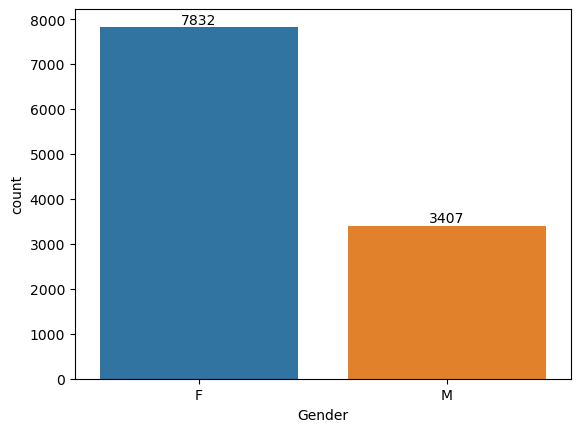

In [71]:
ax = sns.countplot(x='Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars) #To put count lables on bars

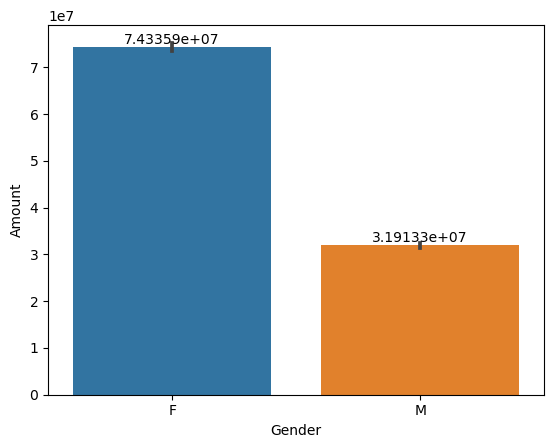

In [75]:
ax1 = sns.barplot(x='Gender', y='Amount', data=df, estimator=sum)
for bars in ax1.containers:
    ax1.bar_label(bars)


## From above graphs we can say that most of the buyers are Females and also purchasing power of Females is greater than males

### Age

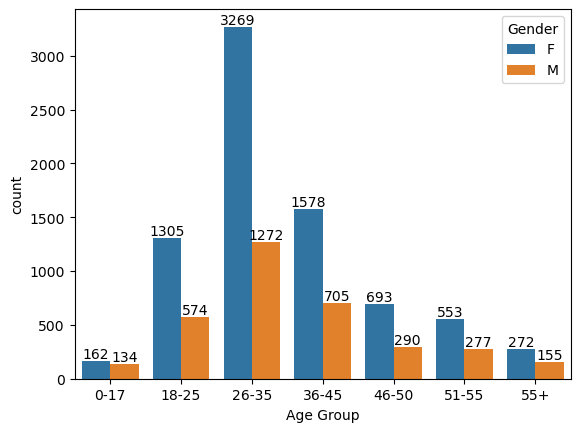

In [81]:
ax = sns.countplot(x='Age Group',data=df, hue = 'Gender',order=sorted(df['Age Group'].unique())) #Hue for seperating male and female bars
for bars in ax.containers:
    ax.bar_label(bars)

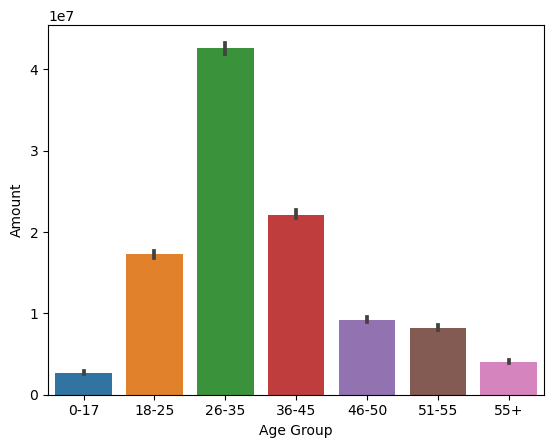

In [104]:
#Total Amount vs Age group
sales_age = sns.barplot(x='Age Group', y='Amount', data=df,estimator=sum,order=sorted(df['Age Group'].unique()))

## From above graphs we can see that Females from Age group 26-35 are maximum buyers and also spent high amount of money.

### State

<Axes: xlabel='State', ylabel='Orders'>

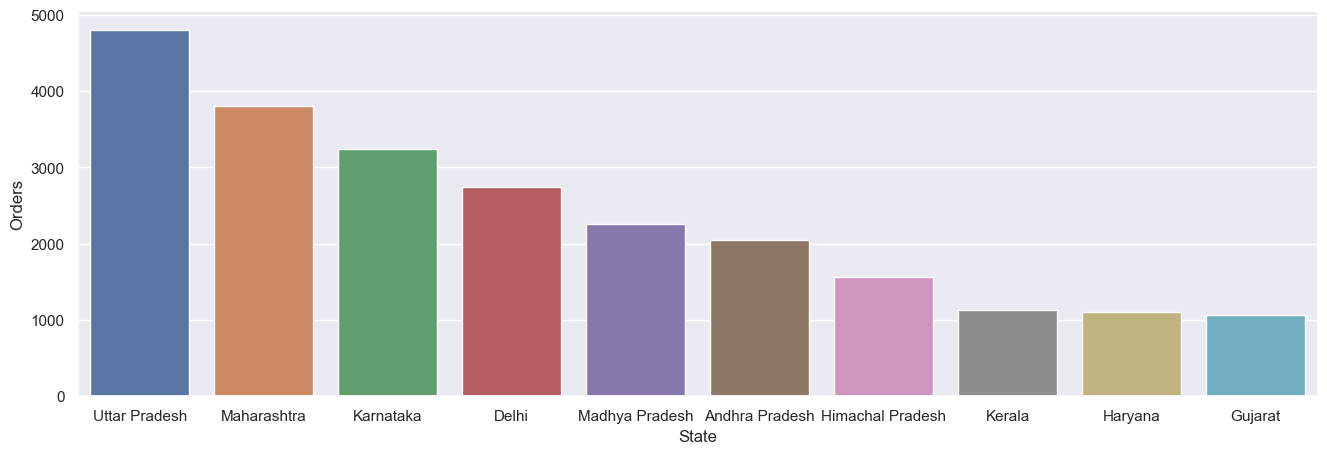

In [160]:
#States Vs Orders
sales_states= df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_states,x='State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

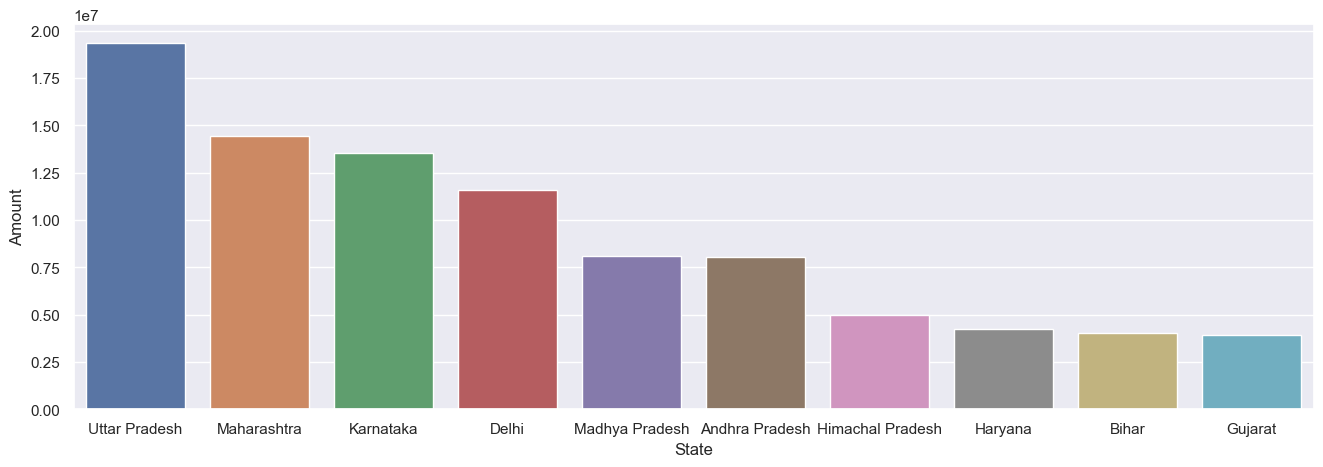

In [164]:
#States vs Amount
sales_states= df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_states,x='State', y = 'Amount')

## From above graphs we can see that in terms of Orders and Amount Uttar Pradesh , Maharashtra and Karnataka are Top 3 States among all States.

### Martial Status

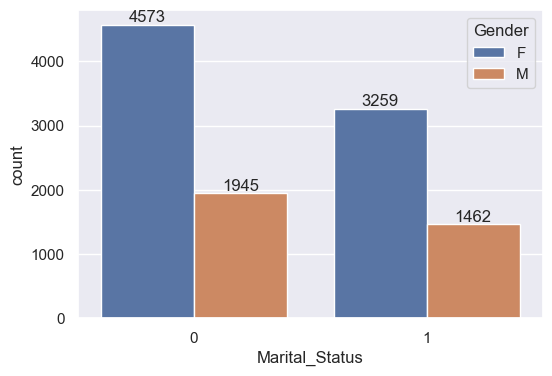

In [195]:
martial_sales=sns.countplot(x= 'Marital_Status',data = df , hue = 'Gender')
sns.set(rc={'figure.figsize':(6,7)})

for bars in martial_sales.containers:
    martial_sales.bar_label(bars)

##### 

## From above graph we can see that most of the buyers are married women and they have high purchasing power.

### Occupation

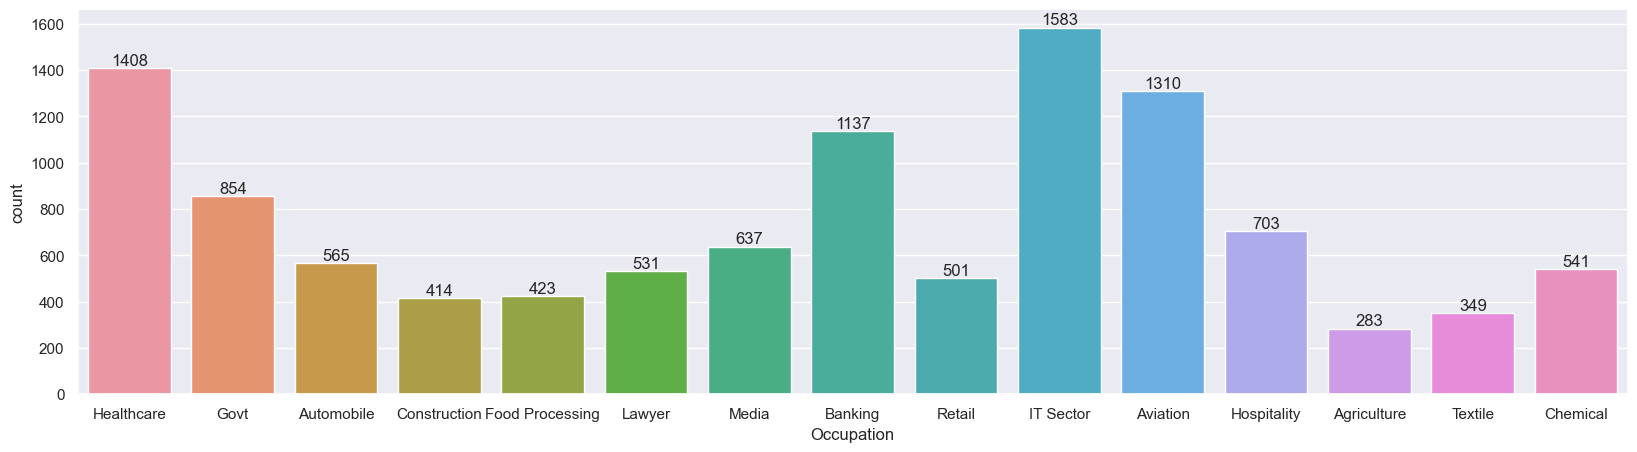

In [221]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

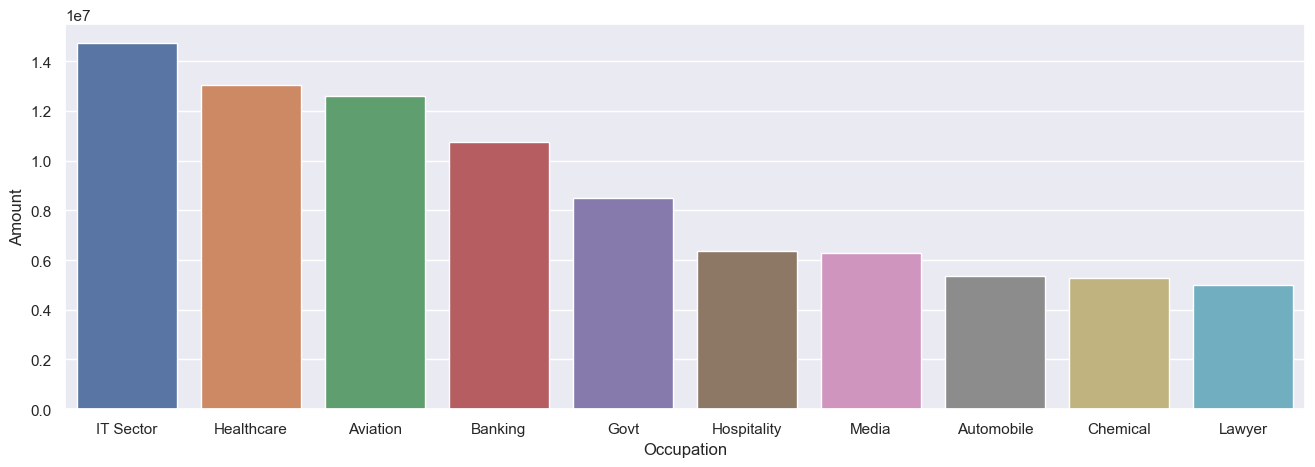

In [241]:
#Occupation vs Amount
occ= df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=occ,x='Occupation', y = 'Amount')

## From above visuals we can say that most of the buyers are from IT sector, Healthcare and Aviation.

### Product Category

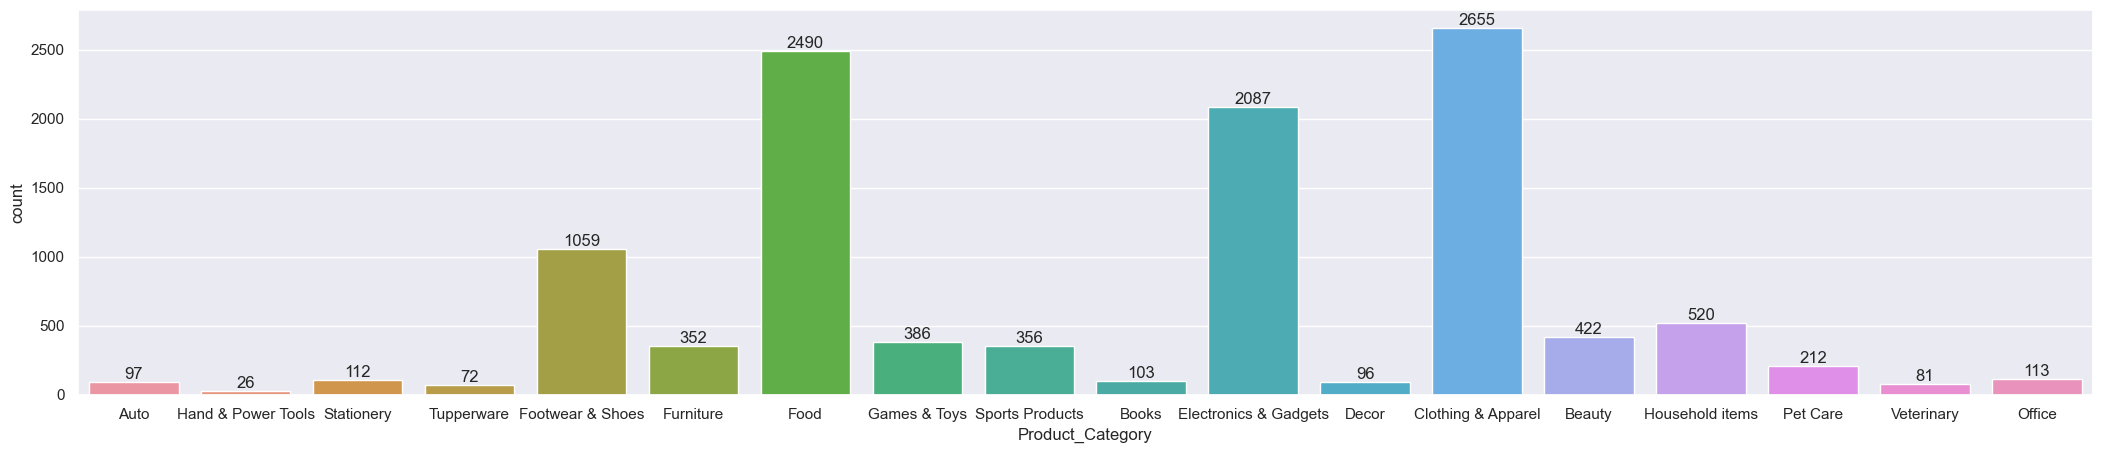

In [255]:
ax = sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(27,5)})
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Product_Category', ylabel='Amount'>

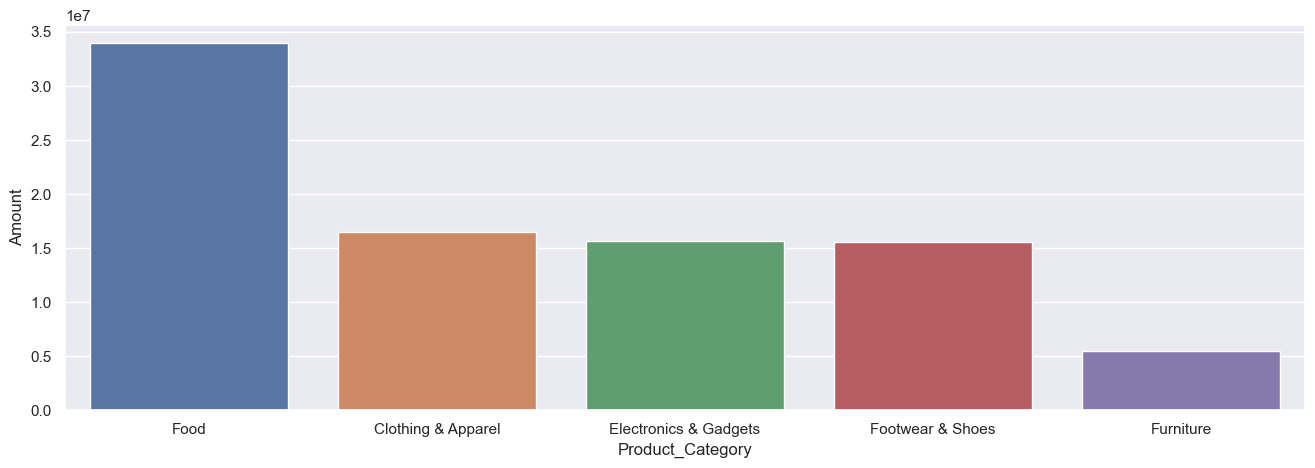

In [265]:
product=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(5)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=product,x='Product_Category', y = 'Amount')

## From above visuals we can see that most sold products are from Food , Clothing and Electronics category.

# Conclusion
# Married Womens from age group 25-35 yrs from UP,Maharashtra and Karnataka working in IT , Healthcare ,Aviation professions are more likely to buy products from Food,Clothing and Electronics Category.